# <font color = violet>Advanced Regression Assignment</font>

### 1. Data Reading

#### 1.1 Importing libraries

In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Making sure that we see all rows and columns, since in newer editions python does not show all data by default

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

#### 1.2 Reading the data and its checking its metrics 

In [4]:
# Reading the dataset into pandas dataframe

house_df = pd.read_csv('train.csv')

In [5]:
# Checking the top 5 rows of our dataset

house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# checking the shape of datasets

house_df.shape

(1460, 81)

In [7]:
# checking the summary of datasets

house_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We can observe that there are numerous columns with a significant amount of null values, which demands further inspection. 
Also certain columns like, `MSSubClass` though are categorical in nature but are represented as numerical in our dataset, so we will rectify that in later stages of data cleaning.

In [8]:
# checking the Numerical-summary of dataset

house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The numerical summary of data appears to be within the sanity limit.

### 2. Data Cleaning

#### 2.1 Dealing with Missing data   A.K.A   Null values

In [9]:
# Checking for Percent of null values for each column in the dataset

((house_df.isnull().sum()/house_df.shape[0])*100).sort_values(ascending = False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageCond        5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Utilities         0.000000
YearRemodAdd      0.000000
MSSubClass        0.000000
Foundation        0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
RoofMatl          0.000000
RoofStyle         0.000000
YearBuilt         0.000000
LotConfig         0.000000
OverallCond       0.000000
OverallQual       0.000000
HouseStyle        0.000000
BldgType          0.000000
Condition2        0.000000
BsmtFinSF1        0.000000
M

As we can see above that there are numerous columns with `larger percentage of null values`, yet most of these columns have null values pertaining to Missing not at random or `MNAR`, where these null values indicate a completely different label which is `Not Available` as per our data dictionary.

The columns where the above condition is met are as follows - :
`Alley`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `FireplaceQu`, `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond`, `PoolQC`, `Fence`, and `MiscFeature`.
Hence we will Impute the missing values in these columns with appropriate label as in `None`.

In [10]:
# Passing the above discussed columns into a list

cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

In [11]:
# Now itetrating over these columns we will convert all null values into label `None`

for i in cols:
    house_df[i] = house_df[i].fillna('None')

In [12]:
# Again checking the Percentage of null values to ascertain the changes we made

((house_df.isnull().sum()/house_df.shape[0])*100).sort_values(ascending = False)

LotFrontage      17.739726
GarageYrBlt       5.547945
MasVnrType        0.547945
MasVnrArea        0.547945
Electrical        0.068493
SalePrice         0.000000
ExterCond         0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
ExterQual         0.000000
BsmtQual          0.000000
Foundation        0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
YearRemodAdd      0.000000
YearBuilt         0.000000
TotalBsmtSF       0.000000
Utilities         0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
LotConfig         0.000000
OverallCond       0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
B

We can observe that the percentage of null is very low in all columns that we can simply impute those values,

For `numerical columns` we will impute missing values with a measure of central tendency namely, `median`.
while for `categorical columns` we will do so by `mode`, or in other words most frequently appearing label.

In [13]:
# Imputing missing values with median for numerical columns

for i in ['LotFrontage','MasVnrArea']:
    house_df[i] = house_df[i].fillna(house_df[i].median())

In [14]:
# Imputing missing values with mode for categorical columns

for i in ['GarageYrBlt','MasVnrType','Electrical']:
    house_df[i] = house_df[i].fillna(house_df[i].mode()[0])

In [15]:
# Again checking the Percentage of null values to ascertain the changes we made

((house_df.isnull().sum()/house_df.shape[0])*100).sort_values(ascending = False)

SalePrice        0.0
Heating          0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
LandContour      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
Utilities        0.0
OverallQual      0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
TotalBsmtSF      0.0
HeatingQC        0.0
SaleCondition    0.0
CentralAir       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF   

As we can see that we have successfully imputed the missing values, Even though we could have guessed a rough estimate for `GarageYrBlt` missing values, doing all that for 5 percent of data could prove to be quite cumbersome with very little gains.

#### 2.2 Dealing with data imbalance

We need to check whether there is any sort of imbalance present in our dataset and rectify it, else it may harm our analysis.

To do so we will iterate over each column and calculate the value counts for each label, then determine whether there is imbalance present or not.

In [16]:
# Now Creating a custom function to check for data imbalance

def imb(x):
    for i in x:                                                  # Iterating over x
        if x[i].value_counts(normalize = True).values[0] > 0.85: # For every feature in x, calculate composition of values in %
            x.drop(i, axis = 1, inplace = True)  # If the % of composition of first value is greater than 85%, drop the feature
            
# Applying our custom function to our dataset

imb(house_df)

In [17]:
house_df.info()  # Checking the Info to look at the features we have retained

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

#### 2.3 Dealing with Outliers

Now we will look upon whether our dataset contains outliers or not, and if it does then we shall treat the dataset accordingly by either binning, capping or even trimming whichever would be applicable in the given scenario.

Let us analyze the dataset for outliers, we will do so by dividing the dataset into numerical and categorical columns, then plot boxplot for all numerical features.

In [18]:
# Making a list of all categorigal columns and Numerical Clolumns

cat_col=[]                                      # initialising an empty list
for i in house_df:                        # iterating over our dataset
    if house_df[i].dtype == 'object':     # Selecting those columns where dtype is object (categorical in nature)
        cat_col.append(i)
        
# also we know that there are columns like `MSSubClass` which are categorical in nature yet represented by `int`
# So we will also add those to our list.

cat_col.extend(['MSSubClass','OverallQual','OverallCond','BsmtFullBath', 'FullBath', 'HalfBath','BedroomAbvGr', 
                'TotRmsAbvGrd', 'Fireplaces', 'GarageCars','MoSold','YrSold','YearBuilt', 'YearRemodAdd',
                'GarageYrBlt'])

num_col = [i for i in house_df.columns if i not in cat_col]  # Adding all columns left out from cat_col (numerical in nature)

num_col.remove('SalePrice')
num_col.remove('Id')         # Removing Target variable and ID from our list

In [19]:
print(cat_col)   # Printing the name of Categorical features
print("\n")
print(num_col)   # Printing the name of Numerical features

['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']


['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


In [20]:
house_df[num_col].describe(percentiles = [.90,.95,.97,.975,.98,.985,.99,.995])    # Numerical summary with aforementioned percentiles

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,472.980137,94.244521,46.660274
std,22.027677,9981.264932,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,213.804841,125.338794,66.256028
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000
50%,69.000000,9478.500000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,480.000000,0.000000,25.000000
90%,92.000000,14381.700000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,757.100000,262.000000,130.000000
95%,104.000000,17401.150000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,850.100000,335.000000,175.050000
97%,114.000000,21571.800000,573.690000,1375.990000,1589.380000,1905.460000,1981.610000,1245.530000,2633.230000,884.000000,385.380000,213.230000
97.5%,119.050000,22698.250000,610.300000,1408.100000,1632.000000,1941.300000,2024.200000,1278.625000,2700.200000,894.525000,405.050000,234.000000
98%,120.820000,25251.620000,650.820000,1442.640000,1678.200000,2001.640000,2072.280000,1318.560000,2782.380000,907.460000,430.100000,240.820000


From above it is evident that there are certainly outliers present in our dataset, we will now plot boxplots to confirm the same

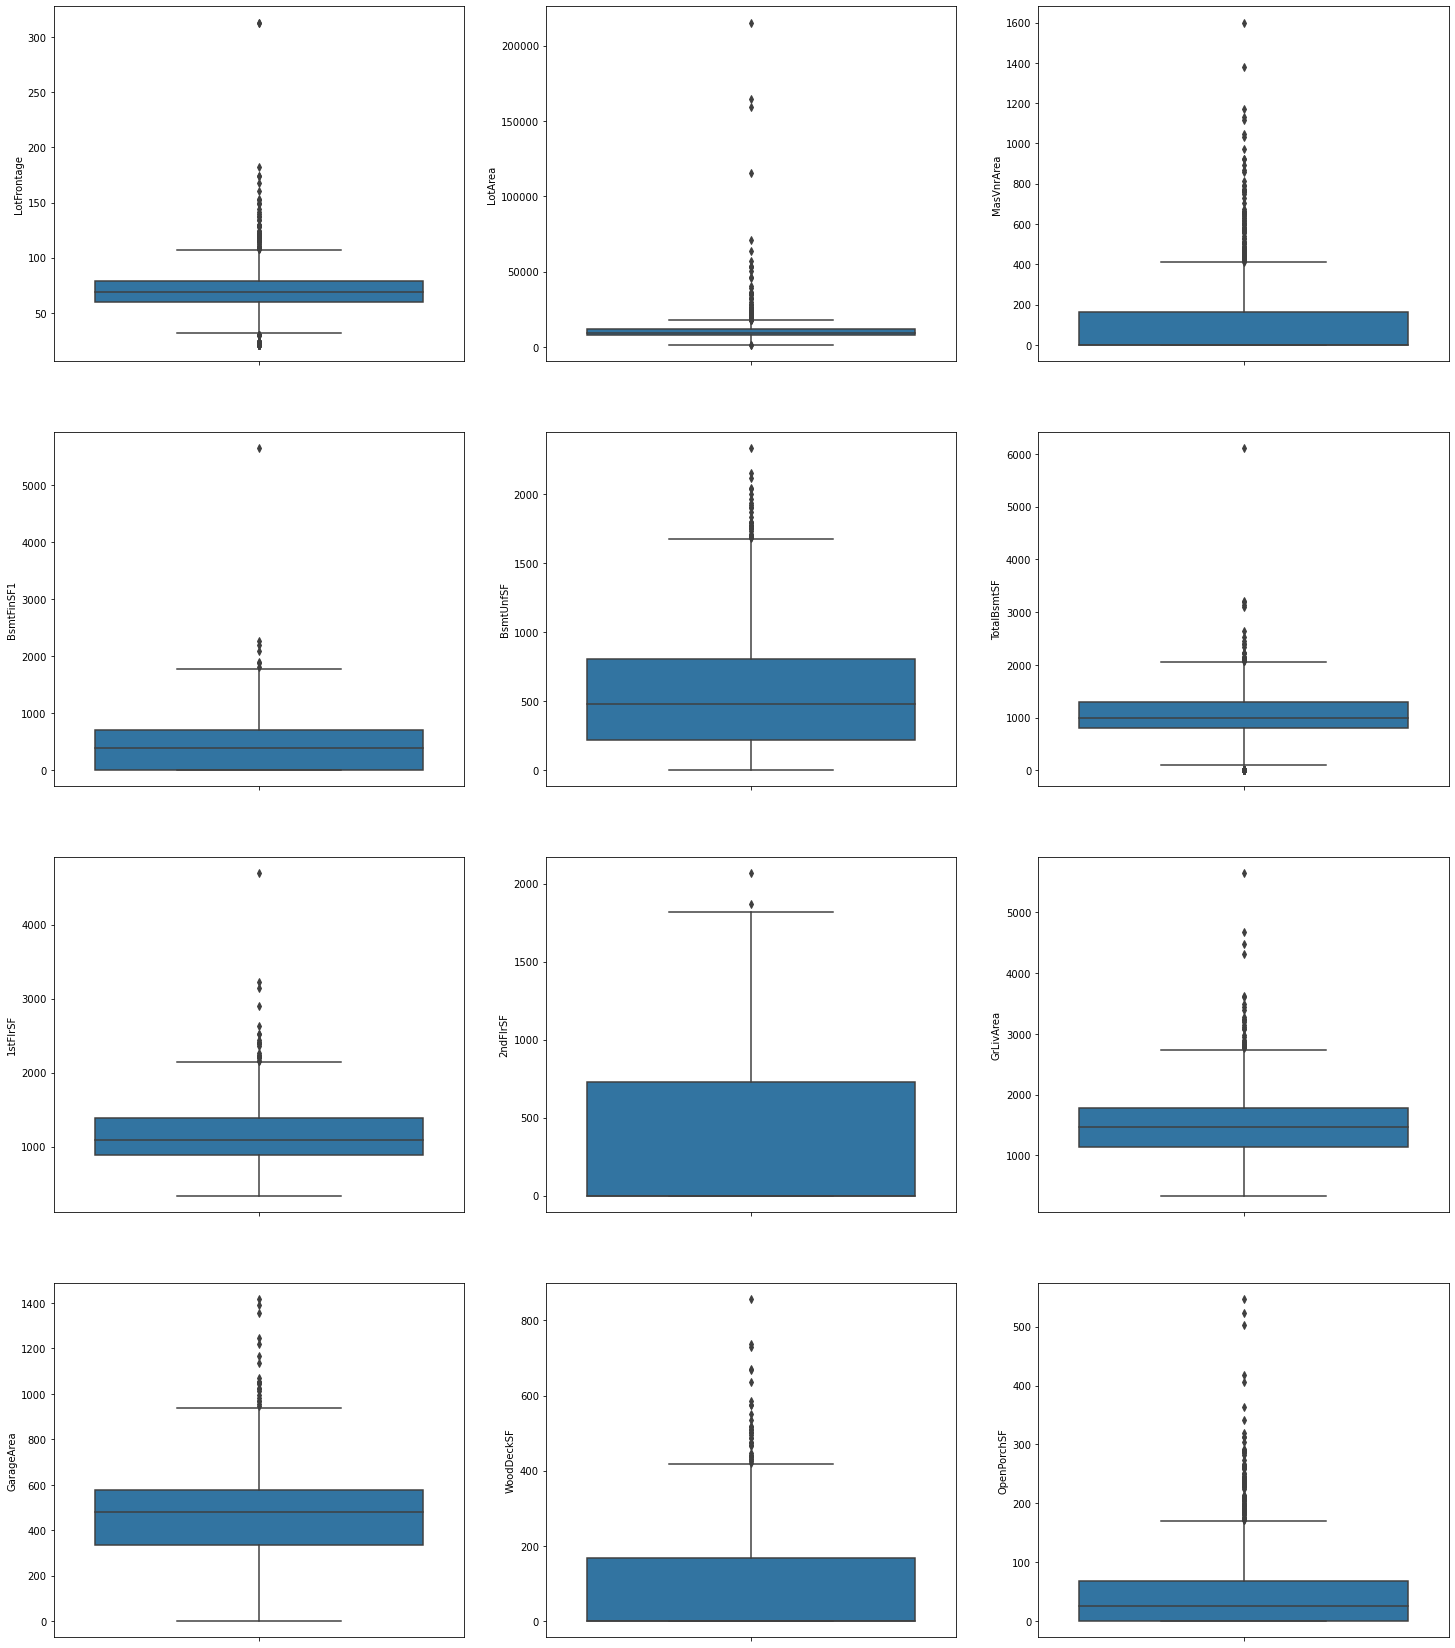

In [21]:
def bplot(x):                                      # Defining a function to plot box plot as we will be uusing same again
    plt.figure(figsize=(25, 30))
    for a,i in enumerate(x, start = 1):            # Enumertaing all numerical columns so as to iterate over them staring at 1
        plt.subplot(4,3,a)                         # Creating subplots for all boxplots of our numerical features
        sns.boxplot(y = i, data = house_df)
    plt.show()
bplot(num_col)                                     # Applying our custom function to dataset

As we can see there are outliers present, so we will simply cap the values to their subsequent percentiles so as to avoid data loss and deal with outliers

In [22]:
# Capping values to their subsequent percentiles

def clp(x,y):                                                 # Defining a custom function since this task is repetitive
    house_df[x] = house_df[x].clip(0,house_df[x].quantile(y)) # Limiting values to a certain quantile based upon boxplot 
                                  

# The function takes x as in our feature and y as in the quantile at which we want to impose an upper limit         
        
clp('LotFrontage',0.98)
clp('LotArea',0.98)
clp('MasVnrArea',0.98)
clp('BsmtFinSF1',0.99)
clp('BsmtUnfSF',0.99)
clp('TotalBsmtSF',0.99)
clp('1stFlrSF',0.99)
clp('2ndFlrSF',0.995)
clp('GrLivArea',0.985)
clp('GarageArea',0.995)
clp('WoodDeckSF',0.995)
clp('OpenPorchSF',0.995)

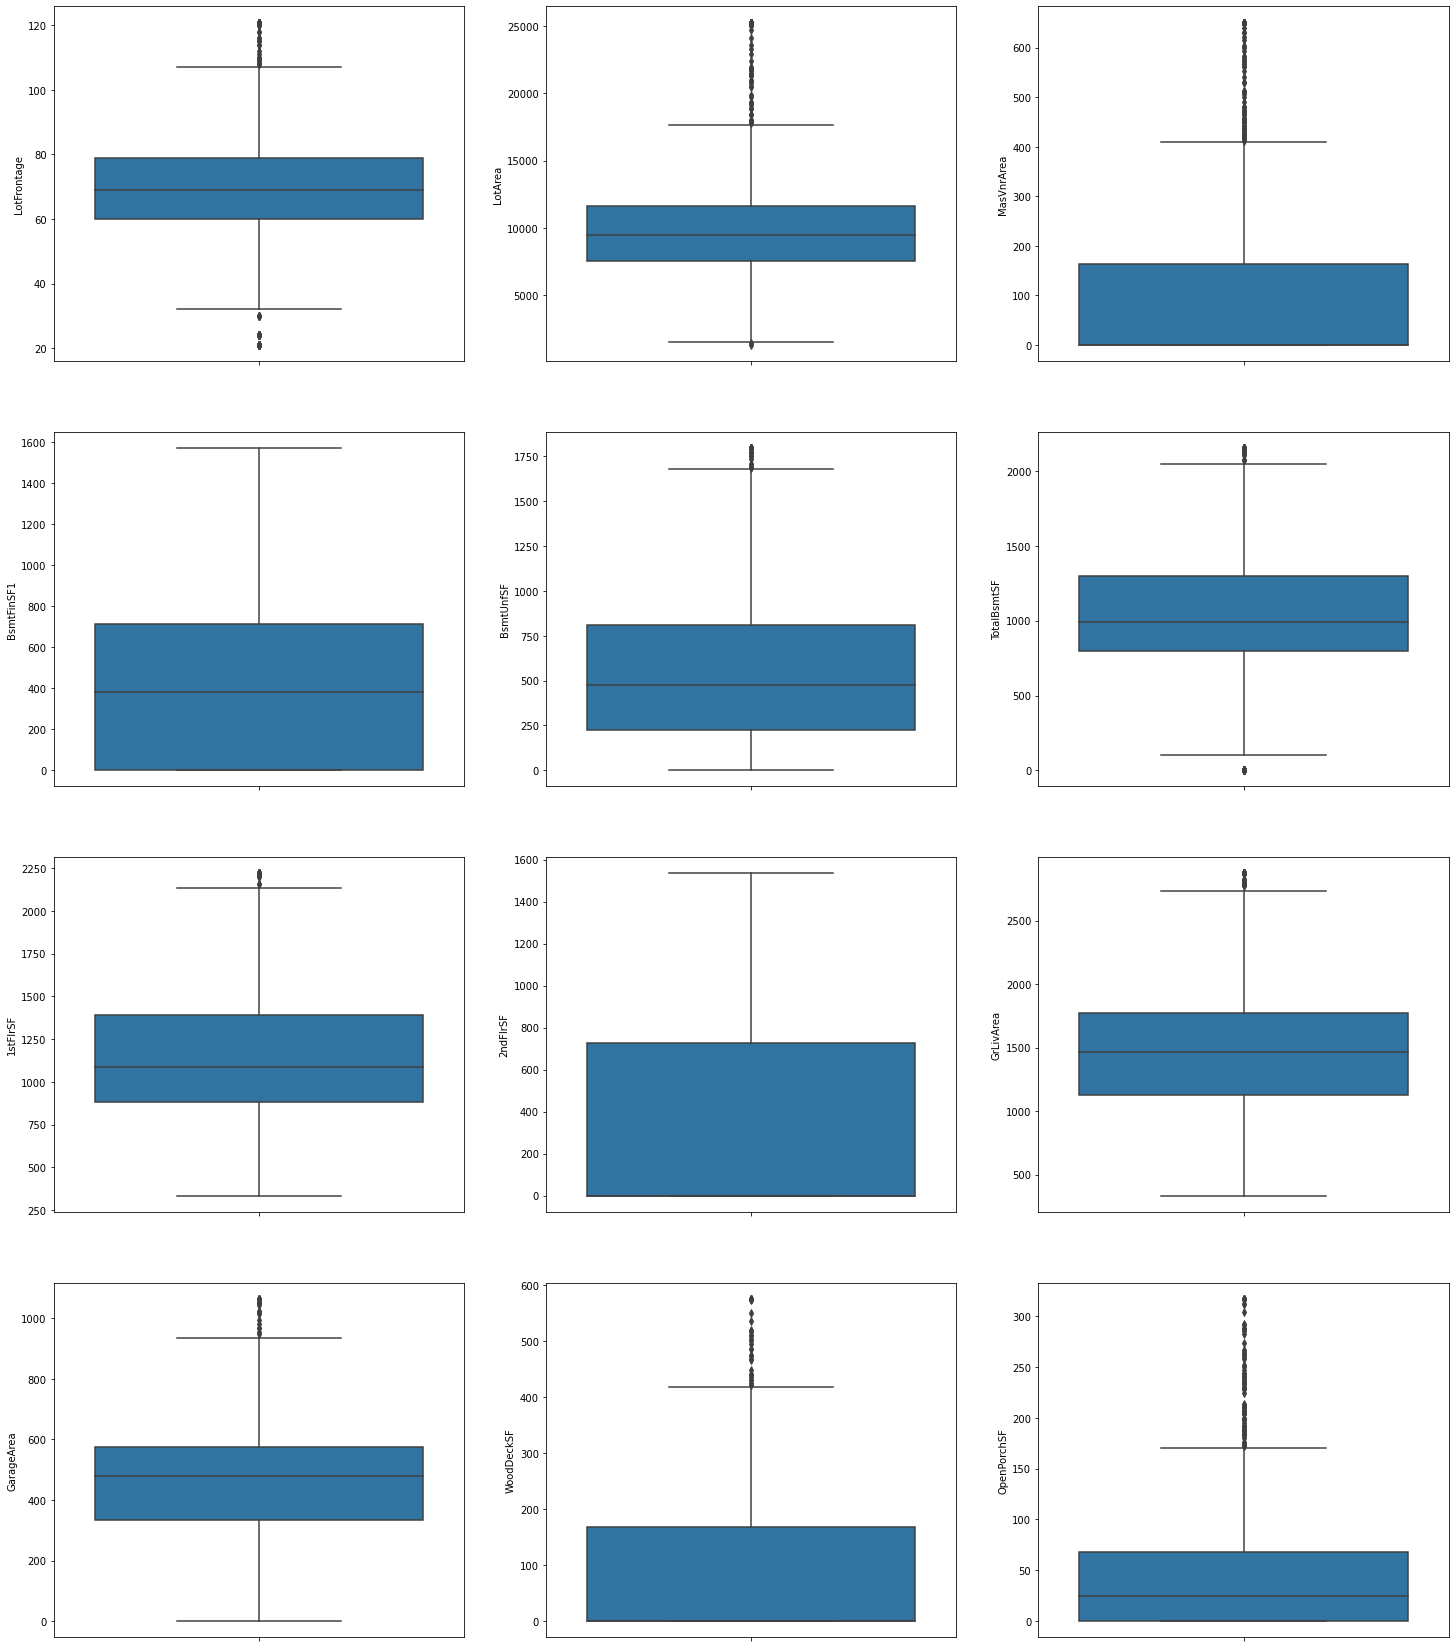

In [23]:
bplot(num_col)       # Checking whether our function worked seamlessly or not

As we can see all the outliers have been effectively dealt with and all values are now within acceptable region

#### 2.4 Checking for duplicates

In [24]:
# Lets see if there are any duplicate values present in our dataset

house_df.duplicated().any()

False

As we can see so duplicate rows are present, therefore we can now move onto data visualization

### 3. Data Visualization

Let us see the distribution of our target variable, i.e `SalePrice`

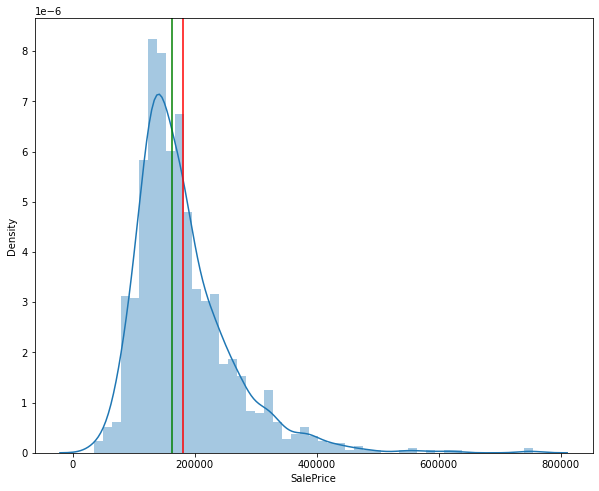

In [25]:
plt.figure(figsize = (10,8))
sns.distplot(house_df['SalePrice'], kde = True)                   # Plotting the distribution of target variable
plt.axvline(house_df['SalePrice'].mean(), color='r')              # Plotting the mean in red line
plt.axvline(house_df['SalePrice'].median(), color='g')            # Plotting the median in green line
plt.show()

We can observe that our target variable follows a normal distribution, though there is some noise present which makes the distribution skewed

In [26]:
# Check for skewness

house_df['SalePrice'].skew()   # The skewness is more than 1, Which implies that our target variable is highly skewed

1.8828757597682129

#### 3.1 Bivariate Analysis

 ##### Scatter plots

Lets plot scatter plots in correspondence with our target variable to see how does the rest of features affect our target feature

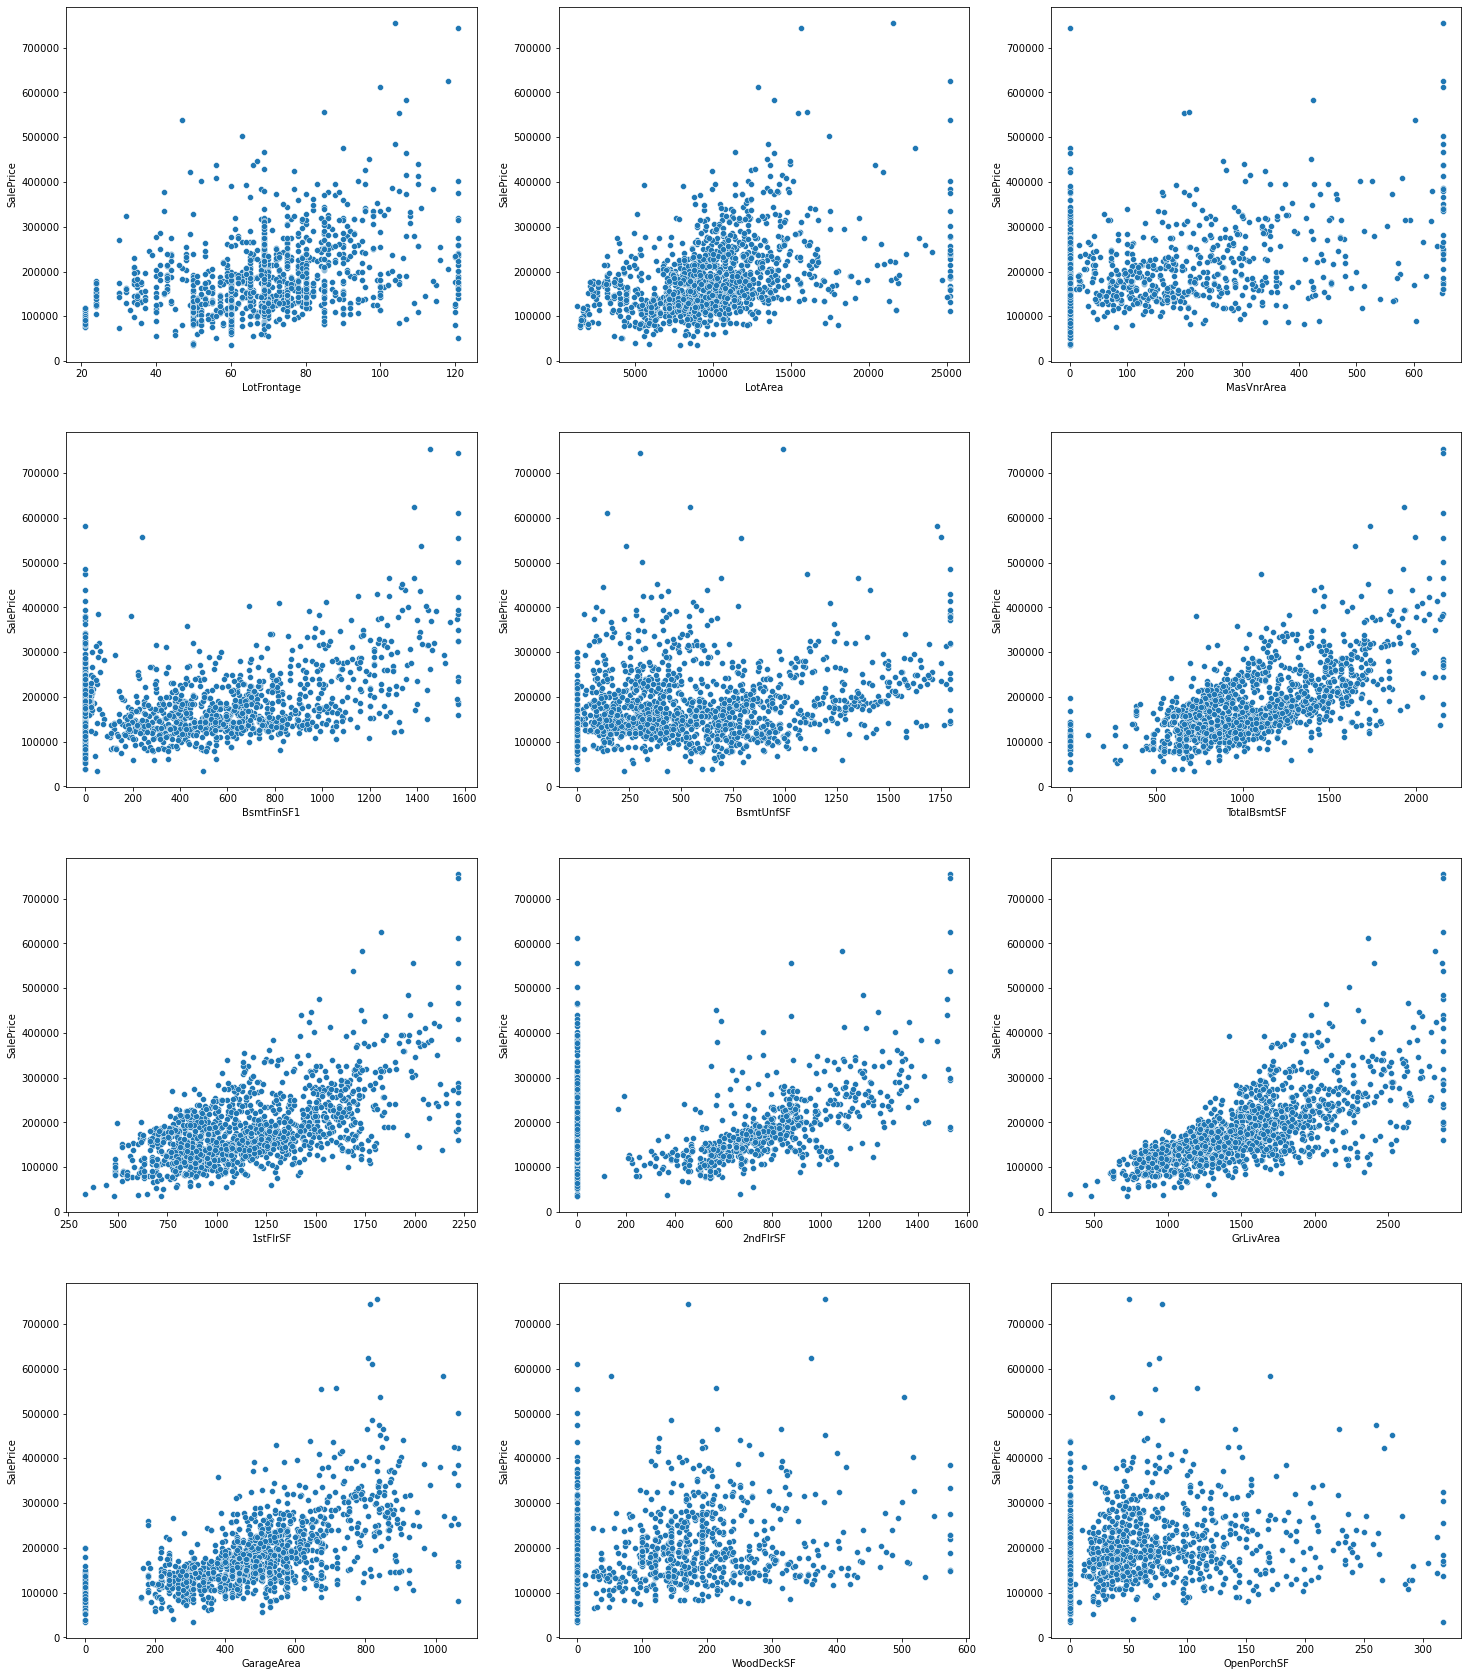

In [27]:
def splot(x):                                      # Defining a function to scatter plot
    plt.figure(figsize=(25, 30))
    for a,i in enumerate(x, start = 1):            # Enumertaing all numerical columns so as to iterate over them staring at 1
        plt.subplot(4,3,a)                         # Creating subplots for all scatterplots of our numerical features
        sns.scatterplot(x = i, y = 'SalePrice', data = house_df)
    plt.show()
    
        
splot(num_col)                                     # Applying our custom function to dataset

We can observe that -:

`Living area above grade` (GrLiveArea) and `Lot area` (Size of Lot) are positively correlated with our target variable and so are `GarageArea`, `1st floor and 2nd floor finished sizes`, and `total basement size`.

 ##### Bar plots

Now lets plot barplots to have a look at how categorical variables affect our target variable.

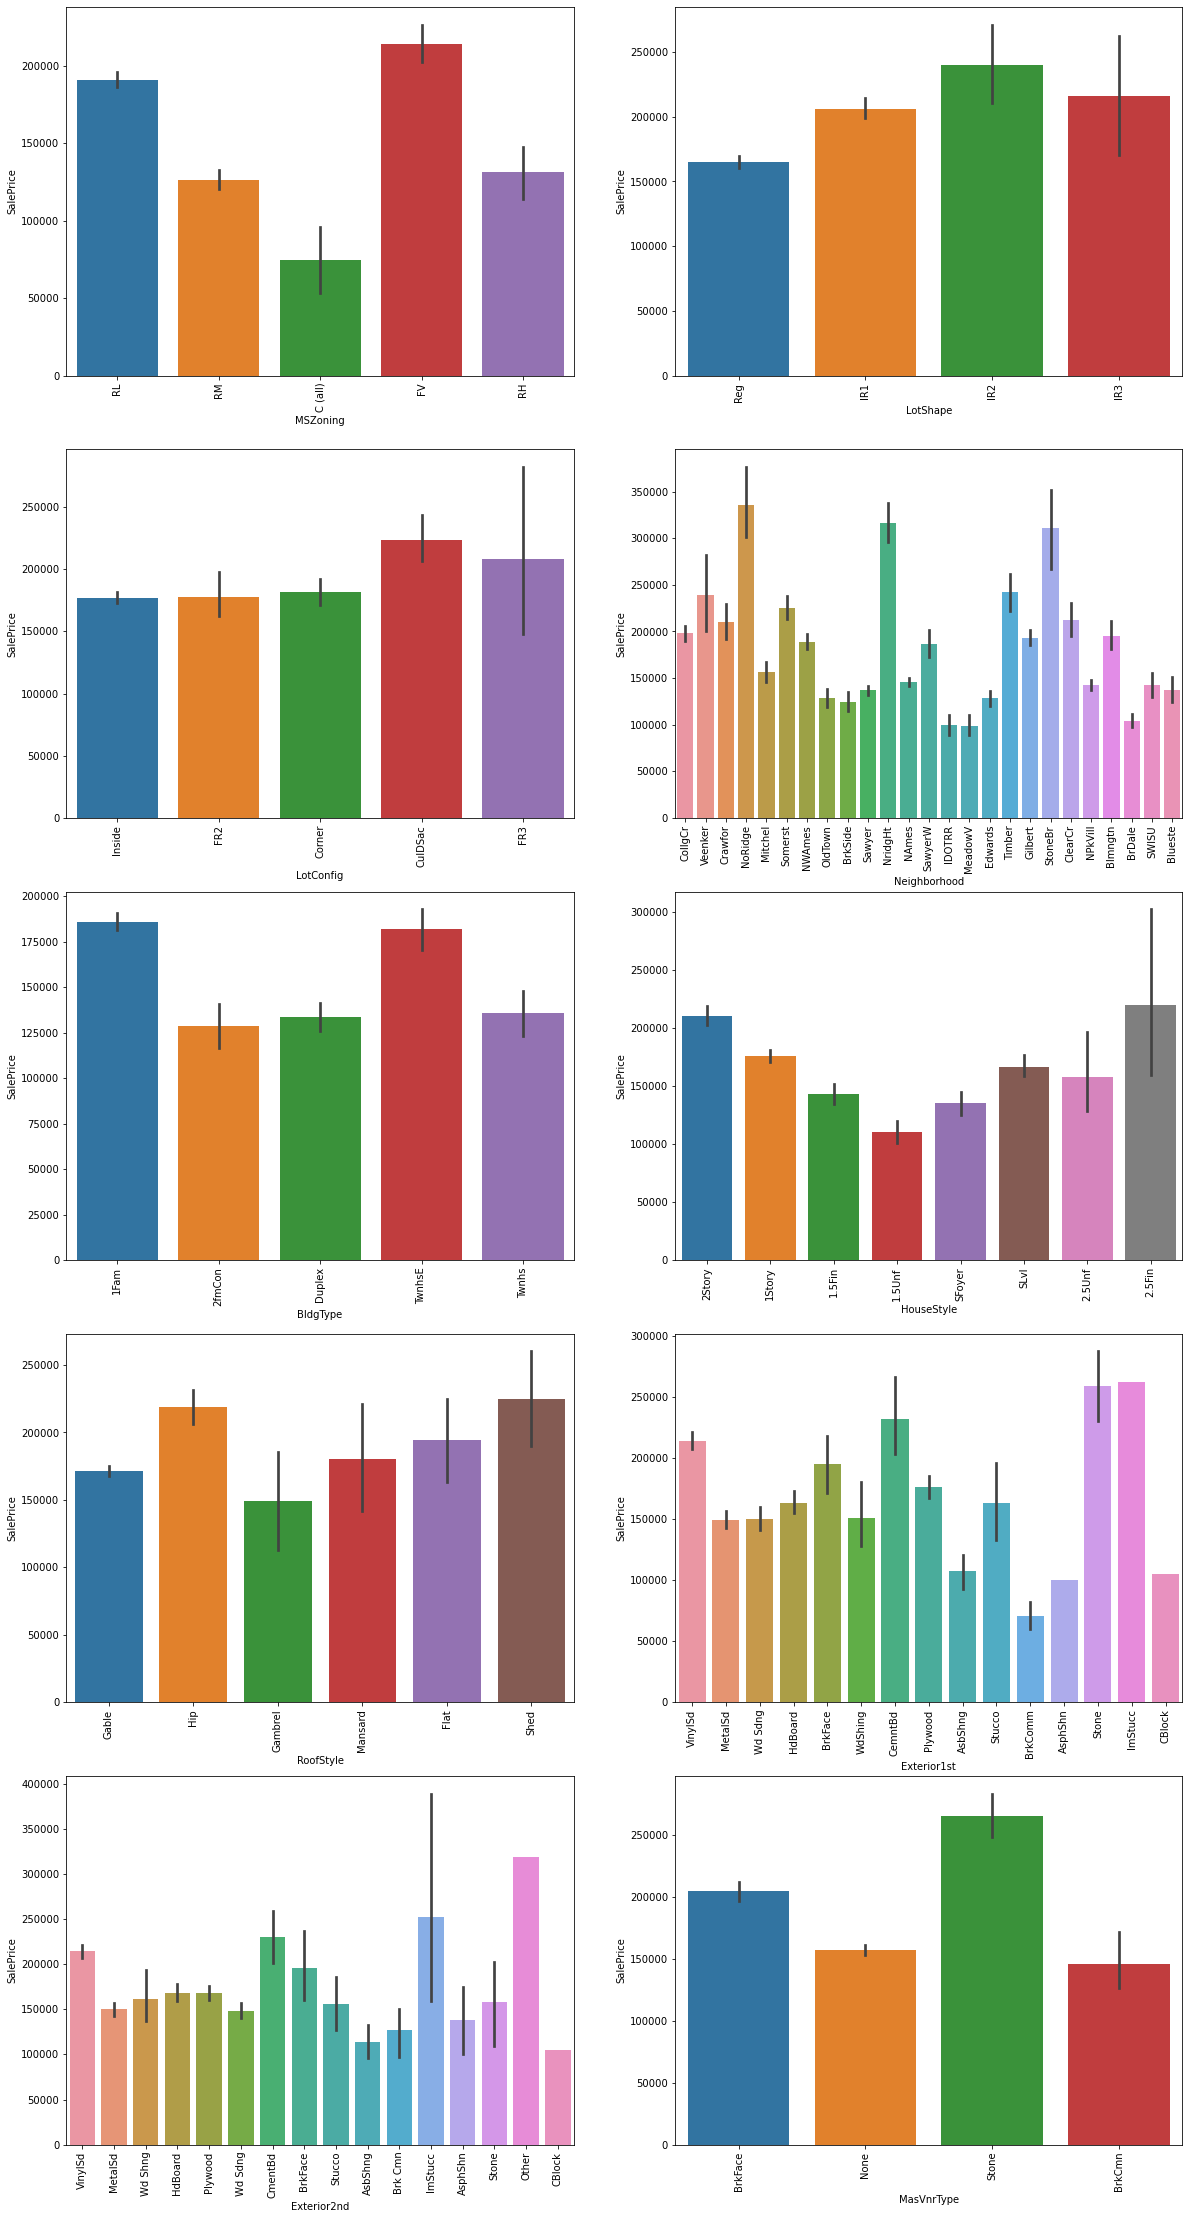

In [28]:
def bplot(x):                                      # Defining a function to plot a bar plot
    plt.figure(figsize=(20, 80))
    for a,i in enumerate(x, start = 1):            # Enumertaing all numerical columns so as to iterate over them staring at 1
        plt.subplot(10,2,a)                        # Creating subplots for all barplots of our numerical features
        sns.barplot(x = i, y = 'SalePrice', data = house_df)
        plt.xticks(rotation=90)
    plt.show()
    
        
bplot(cat_col[:10])                                     # Applying our custom function to dataset

It can be observed that
1. Northridge, Northridge heights and Stone Brook neighborhood have highest prices associated with them, while IODTR and meadow village have lowest,
2. Floating Village zoning have highest price while commercial have lowest,
3. Exterior with Stone and Imitation stucco have high prices while common brick and asbestos shingles have lowest,
4. Masonry veneer with stone also have highest price and
5. Single-family detached dwelling have highest price. 

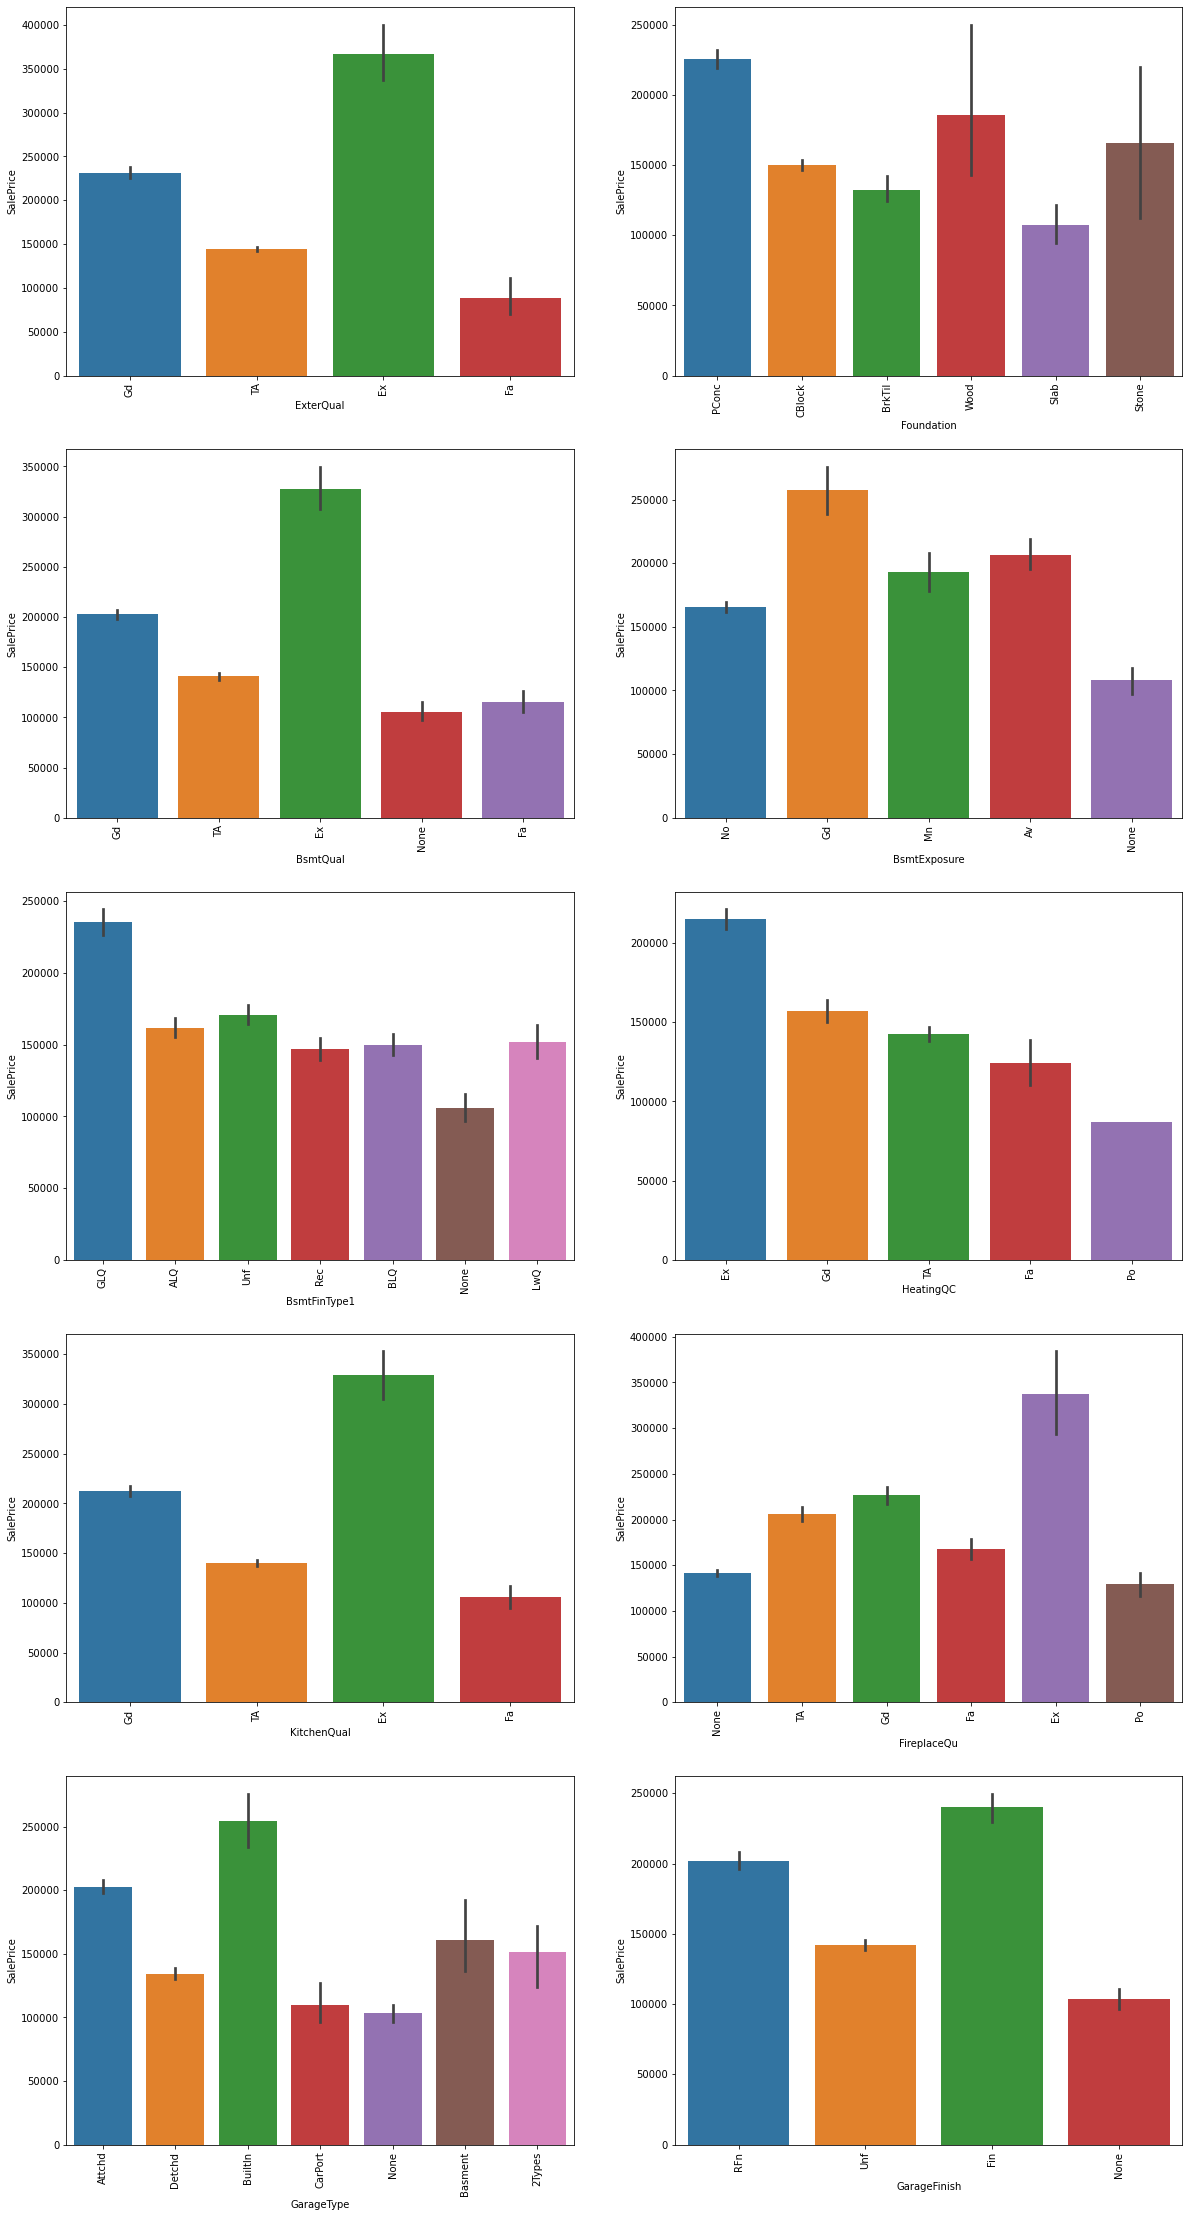

In [29]:
bplot(cat_col[10:20])  # Using our function for other variables

It can be observed that
1. Exterior quality with excellent material fetches highest price while fair material fetches lowest
2. Poured concrete foundation have highest price while slab has lowest,
3. Excellent heating condition have high prices while poor have lowest,
4. Good Living quarters, rated basements finished area have highest prices while None has lowest and
5. Also Excellent fireplace and kitchen quality have highest prices.

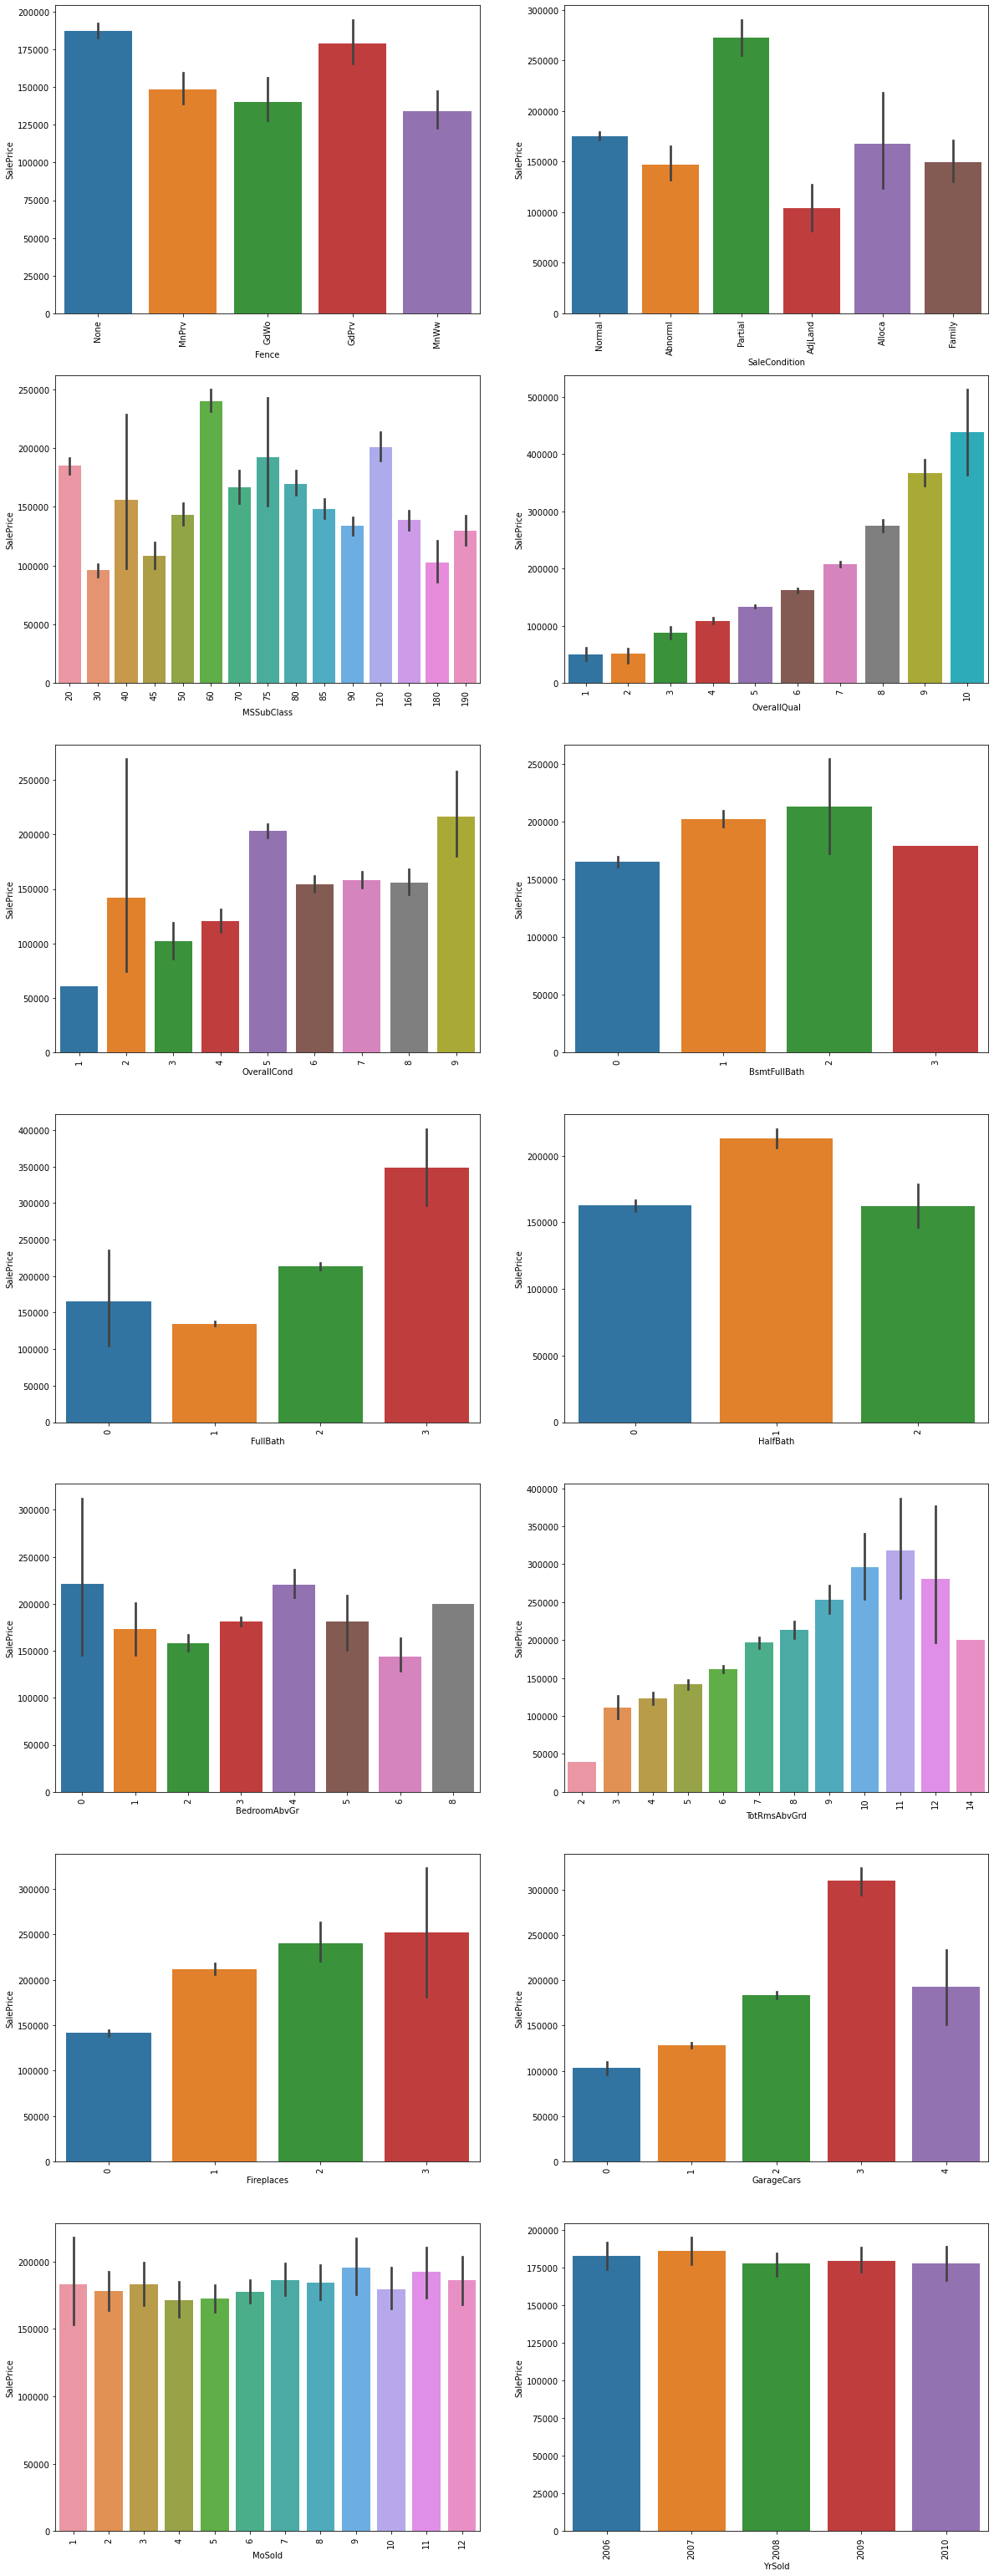

In [30]:
bplot(cat_col[20:34])                       # Using our function for other variables

It can be observed that
1. As overall quality increases so does the price,
2. Partial completed homes fetches highest prices while adjoining land purchase lowest and
3. MSsubclass 60 has highest prices while 30 has lowest,

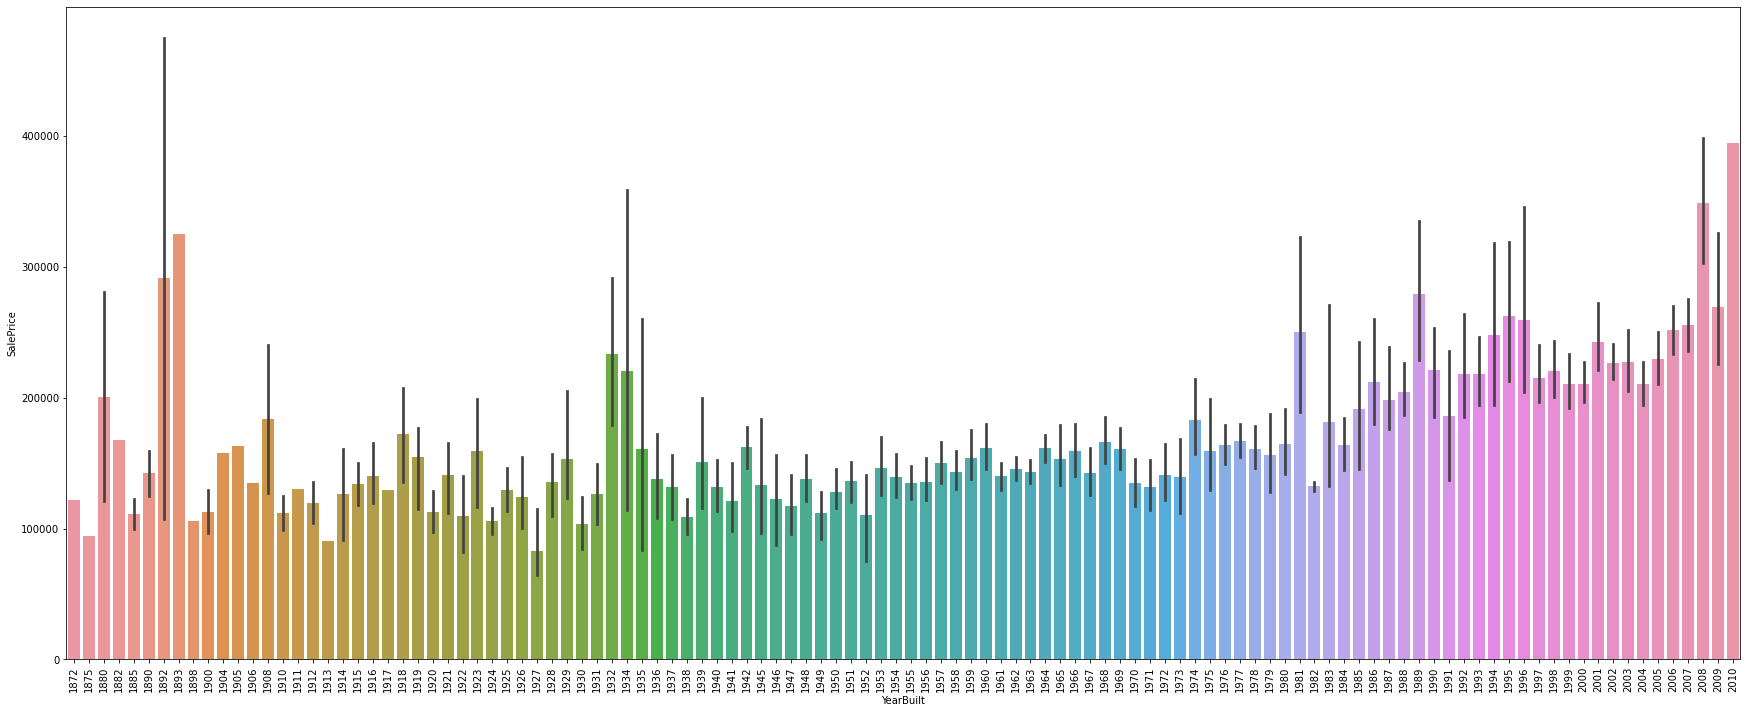

In [31]:
# Plotting bar graph for `year built` with our target variable

plt.figure(figsize=(30,12)) 
plt.xticks(rotation=90)
sns.barplot(data = house_df, x = cat_col[34], y = 'SalePrice')
plt.show()

As time passes or year increases it can be seen that prices also increase albeit some exceptions, hence construction in 2010 surely fetches more price as compared to older constructions.

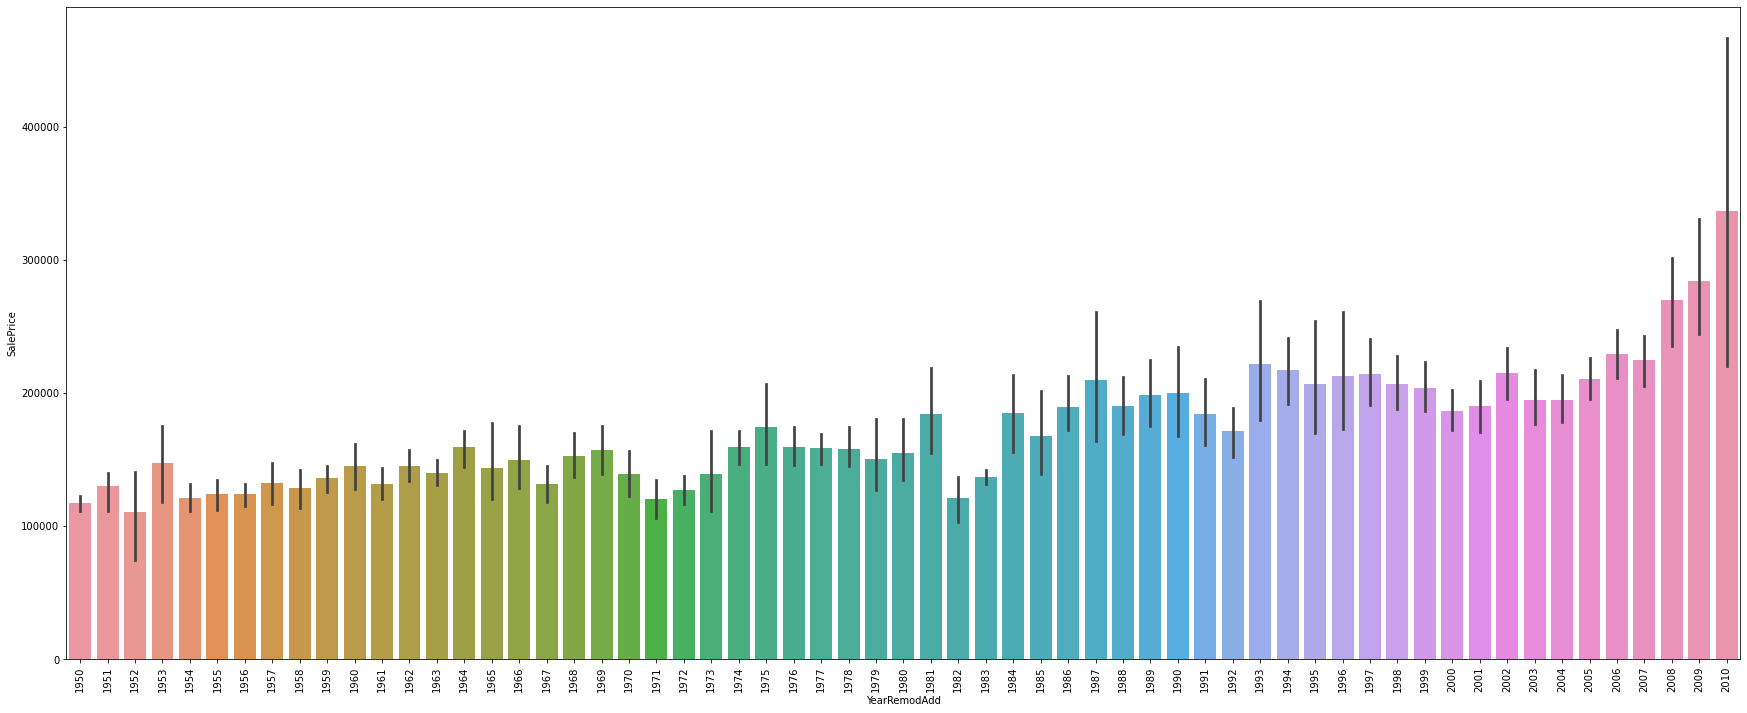

In [32]:
# Plotting bar graph for `year remodeled` with our target variable

plt.figure(figsize=(30,12))
plt.xticks(rotation=90)
sns.barplot(data = house_df, x = cat_col[35], y = 'SalePrice')
plt.show()

Here also the case is same as year built, with remodel date being latest the prices are generally higher than their older counterparts.

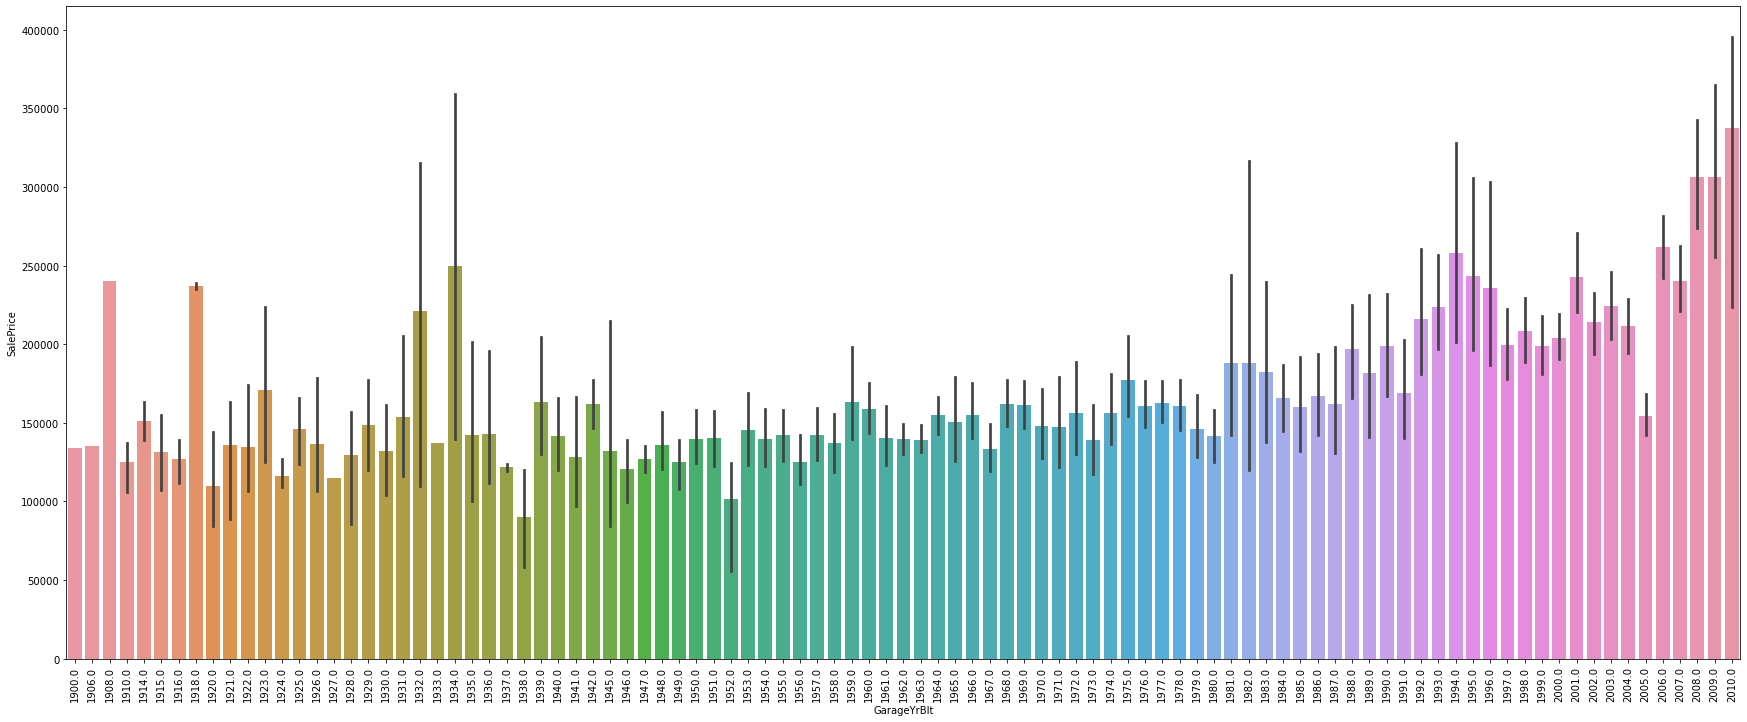

In [33]:
# Plotting bar graph for `Garage year built` with our target variable

plt.figure(figsize=(30,12))
plt.xticks(rotation=90)
sns.barplot(data = house_df, x = cat_col[36], y = 'SalePrice')
plt.show()

Here the increase in prices with passage of time (steepness of curve) is not that significant as compared to upper two plots but the increase has been there.

 ##### Heatmaps and Correlation Matrix

Now lets plot a correlation matrix to better understand the relationship between our dependent variables and target variable

In [34]:
house_df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.026028,-0.002314,-0.028365,0.012609,-0.012713,-0.021998,-0.048064,-0.012495,-0.006029,-0.022656,0.004838,0.004613,0.003342,0.002289,0.005587,0.006784,0.037719,0.027239,-0.019772,-0.003243,0.016570,0.015564,-0.030697,-0.002155,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.405779,-0.338590,0.032628,-0.059316,0.027850,0.040581,0.020481,-0.072091,-0.140218,-0.252805,-0.262008,0.309903,0.076811,0.003491,0.131608,0.177354,-0.023438,0.040380,-0.045569,0.098664,-0.040110,-0.101141,-0.014536,-0.004692,-0.013585,-0.021407,-0.084284
LotFrontage,-0.026028,-0.405779,1.000000,0.530034,0.238693,-0.058408,0.127970,0.077148,0.190473,0.141616,0.151552,0.335180,0.392086,0.060968,0.335292,0.065644,0.188112,0.049049,0.258146,0.325761,0.229323,0.042670,0.301513,0.337440,0.092044,0.136363,0.013651,0.005624,0.364582
LotArea,-0.002314,-0.338590,0.530034,1.000000,0.199857,-0.015250,0.046846,0.043335,0.150476,0.220698,0.064077,0.342982,0.438660,0.118294,0.416366,0.137952,0.199874,0.087025,0.254697,0.364813,0.351926,-0.035222,0.289386,0.325992,0.211014,0.160956,-0.003370,-0.036767,0.411836
OverallQual,-0.028365,0.032628,0.238693,0.199857,1.000000,-0.091932,0.572323,0.550684,0.416902,0.224615,0.304026,0.542601,0.474740,0.292380,0.596617,0.111098,0.550600,0.273458,0.101676,0.427452,0.396765,0.437998,0.600671,0.566918,0.240984,0.320389,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.058408,-0.015250,-0.091932,1.000000,-0.375983,0.073741,-0.131101,-0.043603,-0.136464,-0.177540,-0.146500,0.028197,-0.088930,-0.054942,-0.194149,-0.060769,0.012980,-0.057583,-0.023820,-0.299203,-0.185758,-0.150126,-0.001565,-0.040590,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.127970,0.046846,0.572323,-0.375983,1.000000,0.592855,0.328533,0.252186,0.146386,0.406900,0.287281,0.010432,0.209958,0.187599,0.468271,0.242656,-0.070651,0.095589,0.147716,0.700098,0.537850,0.483941,0.228842,0.211331,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.077148,0.043335,0.550684,0.073741,0.592855,1.000000,0.182855,0.125052,0.179453,0.300546,0.245837,0.139627,0.295708,0.119470,0.439046,0.183331,-0.040581,0.191740,0.112581,0.571369,0.420622,0.375471,0.211508,0.244010,0.021490,0.035743,0.507101
MasVnrArea,-0.048064,0.020481,0.190473,0.150476,0.416902,-0.131101,0.328533,0.182855,1.000000,0.245666,0.112467,0.358916,0.342694,0.157178,0.374007,0.091261,0.274828,0.201595,0.107520,0.285625,0.251210,0.217578,0.377805,0.384368,0.170748,0.147655,-0.000304,0.001705,0.467131
BsmtFinSF1,-0.012495,-0.072091,0.141616,0.220698,0.224615,-0.043603,0.252186,0.125052,0.245666,1.000000,-0.526524,0.464380,0.391543,-0.163502,0.135456,0.663430,0.051258,-0.007134,-0.111752,0.015633,0.244971,0.115031,0.228052,0.276338,0.205879,0.091533,-0.003669,0.014157,0.394340


Lets see this matrix with Heatmaps to get better insights

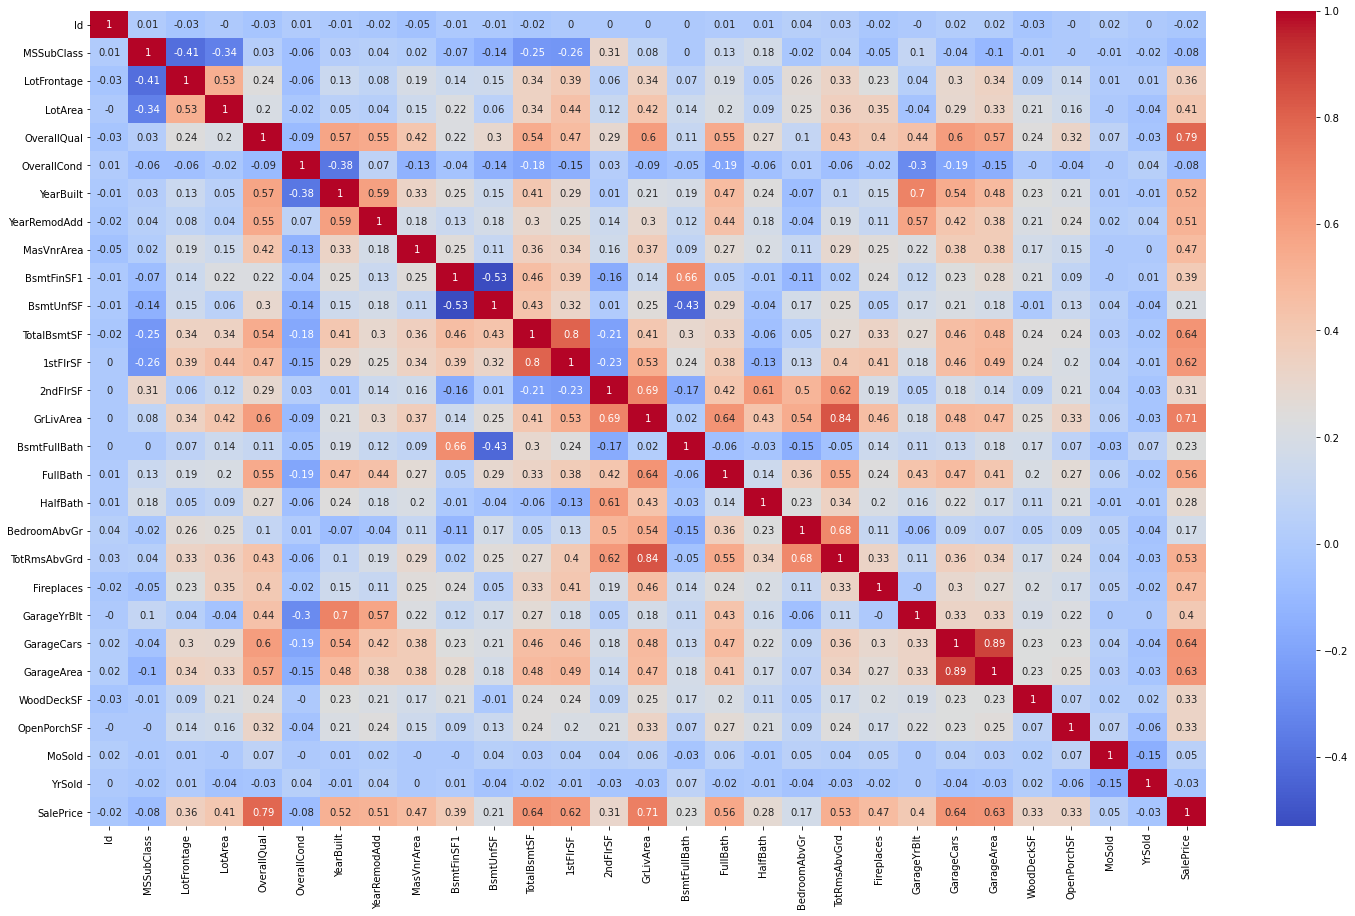

In [35]:
plt.figure(figsize = (25, 15))
sns.heatmap(round(house_df.corr(),2), annot = True, fmt = '.2g', cmap="coolwarm")
plt.show()

We can observe that -:
1. Features like `LotArea`, `OverallQual`, `GarageCars` etc have high correlation with our target variable, which we have already seen from previous analysis.
2. Apart from `yrSold` and `OverallCond` no other feature seem to negatively impact our target variable.
3. There are features like `GrLivingArea` and `TotRmsAbvGr` which are heavily correlated with each other, so we shall deal with such features in later stages so as to avoid issue of Multicollinearity.

Now that visualization is done lets prepare the data for model training

### 4. Data Preparation

Before we go on to do dummy variable creation, we have to do some basic feature engineering to derive some new metrics from features which are not much informative in their current state.

In [36]:
# Deriving New metrics from old ones

house_df['Age'] = house_df['YrSold'] - house_df['YearBuilt']    
house_df['Remold_age'] = house_df['YrSold'] - house_df['YearRemodAdd']
house_df['Garage_age'] = house_df['YrSold'] - house_df['GarageYrBlt']
house_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis = 1, inplace = True)

cat_col.remove('YearBuilt')              # Removing the old columns from our categorical list
cat_col.remove('YearRemodAdd')
cat_col.remove('GarageYrBlt')
cat_col.remove('YrSold')

num_col.extend(['Age','Remold_age','Garage_age'])    # adding the new columns to our numerical list

Lets convert all columns to correct dtypes so that we can create dummies.

In [37]:
house_df[cat_col] = house_df[cat_col].astype('category')   # Converting all categorical type columns to categorical data type

In [38]:
house_df[cat_col].info()        # Checking the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSZoning       1460 non-null   category
 1   LotShape       1460 non-null   category
 2   LotConfig      1460 non-null   category
 3   Neighborhood   1460 non-null   category
 4   BldgType       1460 non-null   category
 5   HouseStyle     1460 non-null   category
 6   RoofStyle      1460 non-null   category
 7   Exterior1st    1460 non-null   category
 8   Exterior2nd    1460 non-null   category
 9   MasVnrType     1460 non-null   category
 10  ExterQual      1460 non-null   category
 11  Foundation     1460 non-null   category
 12  BsmtQual       1460 non-null   category
 13  BsmtExposure   1460 non-null   category
 14  BsmtFinType1   1460 non-null   category
 15  HeatingQC      1460 non-null   category
 16  KitchenQual    1460 non-null   category
 17  FireplaceQu    1460 non-null   ca

All columns have been successfully converted to categorical data type 

In [39]:
house_df[num_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1460 non-null   float64
 1   LotArea      1460 non-null   float64
 2   MasVnrArea   1460 non-null   float64
 3   BsmtFinSF1   1460 non-null   float64
 4   BsmtUnfSF    1460 non-null   float64
 5   TotalBsmtSF  1460 non-null   float64
 6   1stFlrSF     1460 non-null   float64
 7   2ndFlrSF     1460 non-null   float64
 8   GrLivArea    1460 non-null   int64  
 9   GarageArea   1460 non-null   float64
 10  WoodDeckSF   1460 non-null   float64
 11  OpenPorchSF  1460 non-null   float64
 12  Age          1460 non-null   int64  
 13  Remold_age   1460 non-null   int64  
 14  Garage_age   1460 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 171.2 KB


In [40]:
house_df.info()     # Checking info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1460 non-null   float64 
 4   LotArea        1460 non-null   float64 
 5   LotShape       1460 non-null   category
 6   LotConfig      1460 non-null   category
 7   Neighborhood   1460 non-null   category
 8   BldgType       1460 non-null   category
 9   HouseStyle     1460 non-null   category
 10  OverallQual    1460 non-null   category
 11  OverallCond    1460 non-null   category
 12  RoofStyle      1460 non-null   category
 13  Exterior1st    1460 non-null   category
 14  Exterior2nd    1460 non-null   category
 15  MasVnrType     1460 non-null   category
 16  MasVnrArea     1460 non-null   float64 
 17  ExterQual      1460 non-null   ca

All columns are associated with correct dtypes, so we can go forward with dummy variable creation.

 ##### Dummy Variable creation

In [41]:
house_df.drop('Id',axis = 1, inplace  = True)    # Dropping Id cause it is redundant from model building prespective 

In [42]:
# Creating dummy variables using pd.get_dummies

house_df = pd.get_dummies(house_df, drop_first = True)
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 226 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(12), int64(4), uint8(210)
memory usage: 482.0 KB


### 4. Training the data

 ##### Dividing the data into Test-Train split with 30-70 ratio

In [43]:
from sklearn.model_selection import train_test_split         # Importing the libraries

df_train,df_test = train_test_split(house_df, train_size=0.7, test_size = 0.3, random_state=42)

Checking shape of train and test split

In [44]:
df_train.shape

(1021, 226)

In [45]:
df_test.shape

(438, 226)

Now our train dataset has been succesfully scaled  

In [46]:
from sklearn.preprocessing import StandardScaler                   # Importing the libraries


scale = StandardScaler()

In [47]:
# Scaling all variables except dummy and 'yes-no' (0 & 1 in this case) variables i.e num_col

df_train[num_col] = scale.fit_transform(df_train[num_col])
df_test[num_col] = scale.transform(df_test[num_col])

In [48]:
df_train.describe()  # Making sure that the dataset has been successfully scaled

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Age,Remold_age,Garage_age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,10

In [49]:
# Transforming dataset because ML algorithims works best with transformed dataset 

y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

### 5. Model Building

#### Ridge Regression

In [50]:
# Importing relevant liberaries for Ridge regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
# Values of alpha to tune for, higher the value more the regularization and more underfitting,
# while low value of alpha will result in overfitting.

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# Cross Validation


folds = 5
Rmodel_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                       n_jobs=-1)            
Rmodel_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    2.1s finished


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
# Printing the most optimal value of alpha

print(Rmodel_cv.best_params_)

{'alpha': 7.0}


In [53]:
Rcv_results = pd.DataFrame(Rmodel_cv.cv_results_)
Rcv_results = Rcv_results[Rcv_results['param_alpha']<=500]
Rcv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
19,7,-0.072544,-0.087261,1
18,6,-0.072119,-0.087298,2
20,8,-0.072979,-0.087306,3
21,9,-0.073409,-0.087412,4
17,5,-0.071680,-0.087443,5
22,10,-0.073827,-0.087530,6
16,4,-0.071218,-0.087754,7
15,3,-0.070731,-0.088282,8
14,2,-0.070187,-0.089312,9
23,20,-0.077544,-0.089364,10


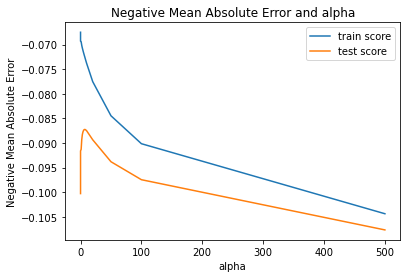

In [54]:
# Plotting mean test and mean train scores with various values of alpha 

Rcv_results['param_alpha'] = Rcv_results['param_alpha'].astype('int32')


plt.plot(Rcv_results['param_alpha'], Rcv_results['mean_train_score'])
plt.plot(Rcv_results['param_alpha'], Rcv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [55]:
# Fitting our Ridge model for alpha = 7

alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 5.89384641e-03  2.10211031e-02 -4.98194858e-03  7.16067055e-03
 -2.56530448e-02  6.96200567e-02 -6.14195603e-04  2.48711615e-02
  1.04098670e-01  1.27204729e-02  7.43376707e-03 -4.65783998e-04
 -6.60538677e-02 -2.71135955e-02 -6.24176677e-03 -7.58623941e-02
  1.41662505e-02 -2.44136862e-03 -1.09716292e-02 -2.28816870e-03
  4.87474344e-02  3.83285617e-02 -1.67924474e-02 -7.89970204e-03
 -3.17873882e-02  7.43214704e-03 -6.01405762e-02 -4.72140538e-04
 -2.08007209e-02  7.55593343e-02  1.92039228e-02  2.52167095e-02
 -2.31365544e-03  2.99614866e-02 -5.39336025e-02  1.82732667e-03
  3.27762882e-02 -3.65636880e-02 -3.30371516e-02 -6.21769506e-03
 -8.11493630e-03  4.72661724e-04  2.68284727e-02  3.37626293e-02
 -5.21274986e-03  8.76934810e-02 -6.38056845e-02 -6.06232065e-03
 -4.25381907e-02 -6.85625463e-02 -3.15370613e-02 -3.58230782e-02
  3.23446513e-02 -2.74425790e-02  4.87231811e-02  5.21807019e-02
 -3.81835021e-02 -2.15631520e-02 -3.14245943e-02 -2.45251824e-02
  2.95274122e-02  9.90952

In [56]:
# Calculating R2 score, RSS and RMSE

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [57]:
r2_score(y_train, y_pred_train)     # Train R2 score

0.9246193510742403

In [58]:
r2_score(y_test, y_pred_test)       # Test R2 score

0.9009367764094354

In [59]:
np.sum(np.square(y_train - y_pred_train))       # Train RSS score

11.94137516792653

In [60]:
np.sum(np.square(y_test - y_pred_test))         # Test RSS score

7.360894836639669

In [61]:
(mean_squared_error(y_train, y_pred_train))**0.5        # Train RMSE

0.10814695613551775

In [62]:
(mean_squared_error(y_test, y_pred_test))**0.5          # Test RMSE

0.1296367848030148

In [63]:
# Creating a DataFrame with our features and their coefficients

Ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(5)})

In [64]:
Ridge_df = Ridge_df.sort_values(by = 'Coefficient', ascending = False)  # Sorting values in descending order of Coefficient

In [65]:
Ridge_df

,Features,Coefficient
82,OverallQual_9,0.11349
91,OverallCond_9,0.10855
8,GrLivArea,0.10410
61,Neighborhood_StoneBr,0.09910
81,OverallQual_8,0.09214
45,Neighborhood_Crawfor,0.08769
99,Exterior1st_BrkFace,0.08396
221,SaleCondition_Alloca,0.08109
185,Fireplaces_2,0.07570
29,MSZoning_FV,0.07556


#### TOP 10 FEATURES FOR RIDGE REGRESSION

In [66]:
R_top10 = Ridge_df.head(10).reset_index().drop('index',axis = 1)

In [67]:
R_top10

,Features,Coefficient
0,OverallQual_9,0.11349
1,OverallCond_9,0.10855
2,GrLivArea,0.10410
3,Neighborhood_StoneBr,0.09910
4,OverallQual_8,0.09214
5,Neighborhood_Crawfor,0.08769
6,Exterior1st_BrkFace,0.08396
7,SaleCondition_Alloca,0.08109
8,Fireplaces_2,0.07570
9,MSZoning_FV,0.07556


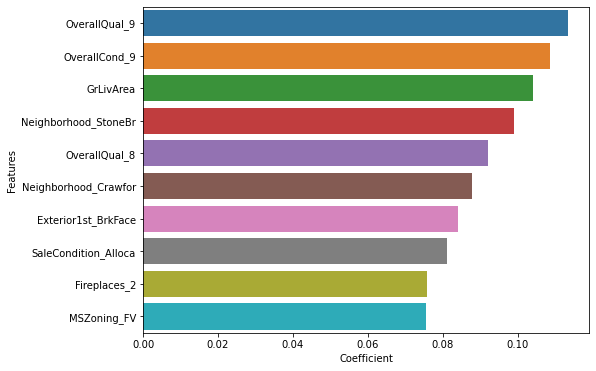

In [68]:
# Plotting the Top 10 features

plt.figure(figsize=(8,6))
sns.barplot(y = 'Features', x='Coefficient', data = R_top10)
plt.show()

We can notice the top 10 features for determining the sale price and their influence on the same

#### Lasso Regression

In [69]:
# Importing relevant liberaries for Lasso regression

from sklearn.linear_model import Lasso

In [70]:
# Values of alpha to tune for

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.005,0.01]}

lasso = Lasso()


# Cross Validation


Lmodel_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                       n_jobs=-1)            

Lmodel_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.1s finished


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.005,
                                   0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [71]:
# Printing the most optimal value of alpha

print(Lmodel_cv.best_params_)

{'alpha': 0.0005}


In [72]:
Lcv_results = pd.DataFrame(Lmodel_cv.cv_results_)
Lcv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
4,0.0005,-0.073977,-0.089079,1
5,0.0006,-0.074942,-0.089154,2
3,0.0004,-0.072854,-0.089187,3
6,0.0007,-0.075926,-0.089511,4
2,0.0003,-0.071750,-0.089713,5
7,0.0008,-0.076983,-0.089973,6
8,0.0009,-0.078019,-0.090471,7
1,0.0002,-0.070713,-0.090649,8
9,0.001,-0.079062,-0.090931,9
0,0.0001,-0.069380,-0.093179,10


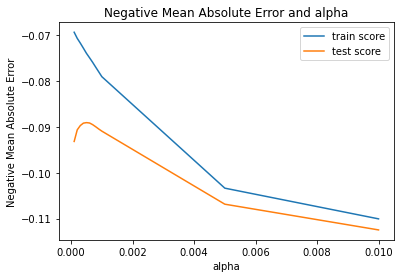

In [73]:
# Plotting mean test and mean train scores with various values of alpha 


plt.plot(Lcv_results['param_alpha'], Lcv_results['mean_train_score'])
plt.plot(Lcv_results['param_alpha'], Lcv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [74]:
# Fitting our Lasso model for alpha = 0.0005

alpha = 0.0005
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[ 6.35074429e-03  1.96699167e-02 -1.23103158e-03  1.20570721e-02
 -2.31317562e-02  7.22478641e-02 -0.00000000e+00  1.78544818e-02
  1.11689669e-01  1.59633290e-02  8.02718781e-03 -0.00000000e+00
 -7.16292108e-02 -2.79147766e-02 -5.02295818e-03 -6.22670784e-02
  0.00000000e+00  0.00000000e+00 -3.14742085e-03 -0.00000000e+00
  4.25723233e-02  2.09656525e-02  0.00000000e+00 -0.00000000e+00
 -4.07141685e-02  0.00000000e+00 -6.09181989e-02 -0.00000000e+00
 -1.63914123e-02  9.86536600e-02  0.00000000e+00  3.15258026e-02
 -4.93361909e-03  1.96243426e-02 -3.99602171e-02 -0.00000000e+00
  3.41695520e-02 -1.39967698e-02 -0.00000000e+00 -1.45312657e-03
 -0.00000000e+00  0.00000000e+00  3.08606767e-02  3.26556525e-02
  0.00000000e+00  1.02097401e-01 -4.00277739e-02  0.00000000e+00
 -1.61684426e-02 -7.66592721e-02 -8.44015882e-03 -1.75580517e-02
  0.00000000e+00 -7.38454795e-03  3.99219005e-02  5.00687806e-02
 -1.44192155e-02 -0.00000000e+00 -1.10087749e-02 -5.21517814e-03
  9.53335948e-03  9.76681

In [75]:
# Calculating R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [76]:
r2_score(y_train, y_pred_train)     # Train R2 score

0.9195955753183356

In [77]:
r2_score(y_test, y_pred_test)       # Test R2 score

0.9036841524564173

In [78]:
np.sum(np.square(y_train - y_pred_train))       # Train RSS score

12.737213249923885

In [79]:
np.sum(np.square(y_test - y_pred_test))         # Test RSS score

7.156751003786817

In [80]:
(mean_squared_error(y_train, y_pred_train))**0.5        # Train RMSE

0.11169258412975612

In [81]:
(mean_squared_error(y_test, y_pred_test))**0.5          # Test RMSE

0.12782650024113484

In [82]:
# Creating a DataFrame with our features and their coefficients

Lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(5)})

In [83]:
Lasso_df = Lasso_df.sort_values(by = 'Coefficient', ascending = False)  # Sorting values in descending order of Coefficient

In [84]:
Lasso_df 

,Features,Coefficient
91,OverallCond_9,0.14595
82,OverallQual_9,0.13843
8,GrLivArea,0.11169
45,Neighborhood_Crawfor,0.10210
99,Exterior1st_BrkFace,0.09995
29,MSZoning_FV,0.09865
61,Neighborhood_StoneBr,0.09767
81,OverallQual_8,0.09225
89,OverallCond_7,0.08483
185,Fireplaces_2,0.08081


#### TOP 10 FEATURES FOR LASSO REGRESSION

In [85]:
L_top10 = Lasso_df.head(10).reset_index().drop('index',axis = 1)

In [86]:
L_top10

,Features,Coefficient
0,OverallCond_9,0.14595
1,OverallQual_9,0.13843
2,GrLivArea,0.11169
3,Neighborhood_Crawfor,0.10210
4,Exterior1st_BrkFace,0.09995
5,MSZoning_FV,0.09865
6,Neighborhood_StoneBr,0.09767
7,OverallQual_8,0.09225
8,OverallCond_7,0.08483
9,Fireplaces_2,0.08081


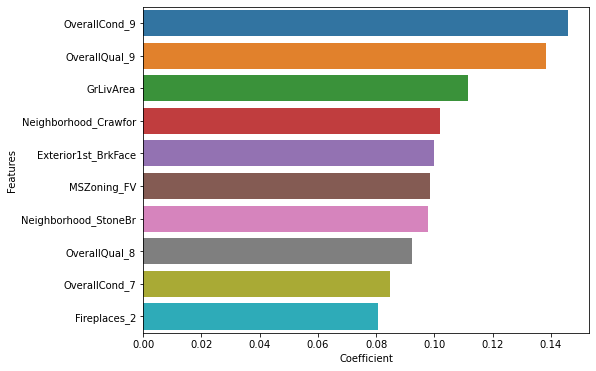

In [87]:
# Plotting the Top 10 features

plt.figure(figsize=(8,6))
sns.barplot(y = 'Features', x='Coefficient', data = L_top10)
plt.show()

We can notice the top 10 features for determining the sale price and their influence on the same

### 6. `Conclusion`

The optimal values of alpha are -:

    1. Ridge Regression    --->  7

    2. Lasso Regression    ---> 0.0005

The Train R2 scores are -:

    1. Ridge Regression    --->  0.9246
    2. Lasso Regression    --->  0.9196

The Test R2 scores are -:

    1. Ridge Regression    --->  0.9009
    2. Lasso Regression    --->  0.9037

The Mean squared errors are -:

    1. Ridge Regression Train   --->  0.0117
    2. Ridge Regression Test    --->  0.0168
    3. Lasso Regression Train   --->  0.0125
    4. Lasso Regression Test    --->  0.0163

+ As we can notice we have achieved an excellent score in both testing and training, with minimal difference between the two, in both the cases of Lasso and Ridge, also we can see that though Ridge performs better than Lasso in training, Lasso outperforms Ridge in testing, even though the difference between both is very minimal, still Lasso would be preferred due to its ability to reduce the number of features.

#### TOP 10 FEATURES ARE

In [88]:
T_10 = pd.DataFrame({'Ridge Features' : R_top10['Features'], 'Lasso Features' : L_top10['Features']})

In [89]:
T_10

,Ridge Features,Lasso Features
0,OverallQual_9,OverallCond_9
1,OverallCond_9,OverallQual_9
2,GrLivArea,GrLivArea
3,Neighborhood_StoneBr,Neighborhood_Crawfor
4,OverallQual_8,Exterior1st_BrkFace
5,Neighborhood_Crawfor,MSZoning_FV
6,Exterior1st_BrkFace,Neighborhood_StoneBr
7,SaleCondition_Alloca,OverallQual_8
8,Fireplaces_2,OverallCond_7
9,MSZoning_FV,Fireplaces_2


* We can see that most prominent features to help us determine the sale price are the `Overall Quality`, `Overall Condition`, `Living area above ground`, `Zoning classified with Floating Village residential`,and `Neighborhood` based in `Crawford` and `Stone Brook` among other features discussed above.

* Also we can notice that Lasso reduces the Coefficient of certain features to 0 which in turn helps us reduce the number of features whereas Ridge only reduces the coefficient to near 0 but not 0, hence Lasso is generally preferred due to its ability to reduce the features.